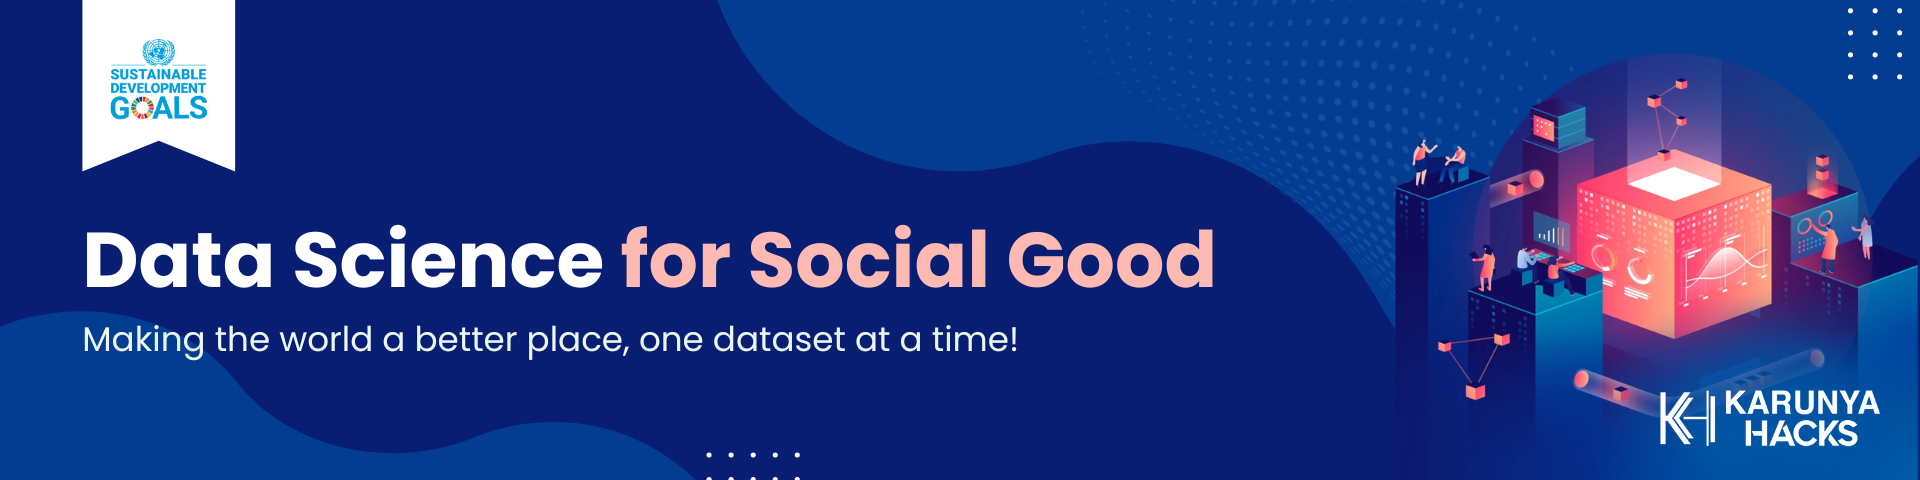

In [1]:
import pandas as pd
path = "./datasets/Cancer.csv"
df = pd.read_csv(path)
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,M


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
df.dropna(inplace = True)
df['diagnosis']= df['diagnosis'].replace({'M':1, 'B':0})

a) Use the columns: 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
'symmetry_mean', 'fractal_dimension_mean' as the independent variables

In [4]:
x=df.iloc[:, 1:-1].values
print(x[0:10])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414e-01
  1.052e-01 2.597e-01 9.744e-02]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
  1.043e-01 1.809e-01 5.883e-02]
 [1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
  8.089e-02 2.087e-01 7.613e-02]
 [1.825e+01 1.998e+01 1.196e+02 1.040e+03 9.463e-02 1.090e-01 1.127e-01
  7.400e-02 1.794e-01 5.742e-02]
 [1.371e+01 2.083e+01 9.020e+01 5.779e+02 1.189e-01 1.645e-01 9.366e-02
  5.985e-02 2.196e-01 7.451e-02]
 [1.300e+01 2.182e+01 8.750e+01 5.198e+02 1.273e-01 1.932e-01 1.859e-01
  9.353e-02 2.350e-01 7.389e-02]
 [1.246e+01 2.404e+01 8.397e+01 4.759e+02 1.186e-01 2.3

c. Encode the categorical value of the target column to numerical value

In [5]:
df['diagnosis']= df['diagnosis'].replace({'M':1, 'B':0})
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

b. Use the target variable as 'diagnosis' (Malignant – M, Benign – B)

In [6]:
y = df.iloc[:, -1].values
print(y[0:10])

[1 1 1 1 1 1 1 1 1 1]


d. Divide the data into training (75%) and testing set (25%)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [8]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

e. Perform the classification with K=3

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]
[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0]


f. Analyse the performance of the classifier with various performance measures such as
confusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operating characteristic (ROC) curve and Area Under Curve (AUC) score. 

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [12]:
# Calculate specificity, recall, precision and F1-score
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

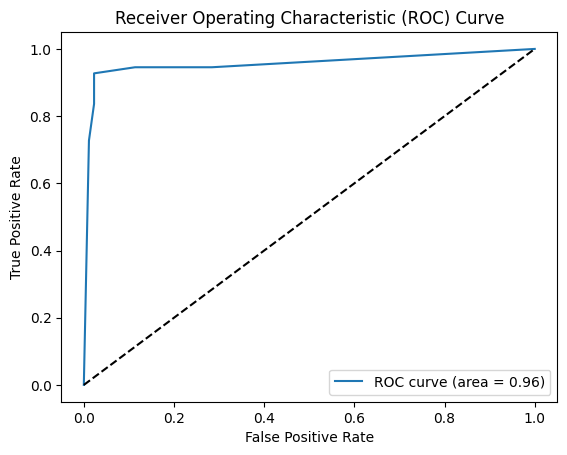

In [13]:
# Plot ROC curve and calculate AUC score
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[86  2]
 [ 4 51]]
Accuracy:  0.958041958041958
Specificity:  0.9772727272727273
Recall:  0.9272727272727272
Precision:  0.9622641509433962
F1-score:  0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        88
           1       0.96      0.93      0.94        55

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

AUC score:  0.9556818181818181
True positive:  51
True negative:  86


Develop the linear regression model for the income dataset using the scikit-learn

a. Divide the data into training (75%) and testing set (25%)

In [16]:
path='./datasets/income.data.csv'
#For temporary storage directly upload the file on colab
import pandas as pd

#Can write the path directly as well
df = pd.read_csv(path)
df

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [17]:
#can be done by using either train_size or test_size
from sklearn.model_selection import train_test_split
x = df['income']
y = df['happiness']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, shuffle = True)
from sklearn.linear_model import LinearRegression
print(x_train.shape)
print(x_test.shape)



(373,)
(125,)


Analyse the impact of income to the happiness and display the intercept and regression
coefficients

In [18]:
import numpy as np
x_train=np.array(x_train).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)

model=LinearRegression()
model. fit(x_train,y_train)

print (model. coef_)
print(model.intercept_)

[[0.71048631]]
[0.20217998]


c. Predict the y value (y’) for the testing set (x)

In [19]:
y_test=np.array(y_test).reshape(-1,1)
y_pred=model.predict(y_test)
print(y_pred)

[[3.16426899]
 [2.8717463 ]
 [3.22423442]
 [2.49359264]
 [0.84071733]
 [3.32234666]
 [1.23992789]
 [2.47630304]
 [1.90143411]
 [3.77589177]
 [4.30013311]
 [1.3432724 ]
 [2.29636073]
 [2.51920521]
 [2.09737765]
 [0.59024063]
 [2.90508223]
 [1.51895808]
 [2.45826257]
 [3.06605433]
 [4.67760517]
 [2.22084116]
 [3.84868095]
 [2.25580329]
 [1.76594768]
 [0.81284229]
 [1.20412878]
 [2.02997578]
 [3.3011147 ]
 [2.45605531]
 [2.52367654]
 [2.31794904]
 [2.8228368 ]
 [3.82409886]
 [3.91934723]
 [4.57908406]
 [2.74847421]
 [2.45398125]
 [1.92259747]
 [3.15772284]
 [1.90703545]
 [4.43910972]
 [2.9178507 ]
 [0.52785097]
 [3.98445909]
 [2.84667939]
 [2.23247586]
 [0.68946622]
 [3.12223938]
 [3.46997181]
 [4.46864136]
 [1.57169835]
 [4.41063626]
 [3.44818201]
 [1.74333936]
 [2.44473583]
 [3.26988999]
 [1.91685467]
 [3.61400046]
 [2.91900764]
 [1.96533976]
 [1.93228154]
 [2.86737431]
 [4.00211151]
 [1.13487726]
 [2.16917776]
 [3.24612042]
 [1.35863506]
 [3.09969152]
 [0.89229839]
 [2.1491934 ]
 [4.72

In [20]:
#Performance analysis

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print('variance score:',r2_score(y_test, y_pred))

print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error: 0.7566775558231059
Mean squared error: 0.7486040043126048
variance score: 0.655128598189441
Root Mean Squared Error: 0.8652190499015869
